In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df = pd.read_csv("Datas/train.csv")

In [219]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [220]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [221]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [222]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [223]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [224]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [225]:
# a priori : pas de valeurs nulles, pas de valeurs abérantes.

# analyse variables c0

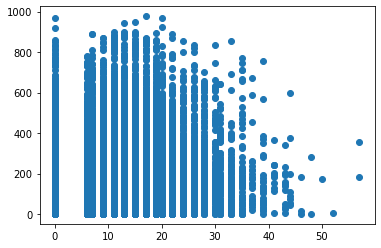

In [226]:
plt.scatter(df["windspeed"],df["count"])

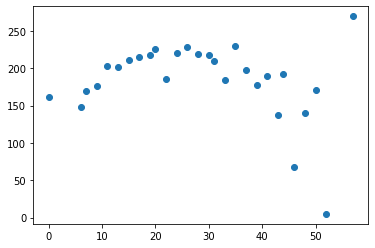

In [227]:
wind = df.groupby(["windspeed"])["count"].mean()

plt.scatter(wind.index,wind)

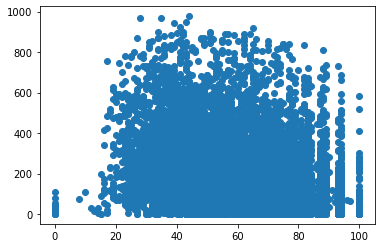

In [228]:
plt.scatter(df["humidity"],df["count"])

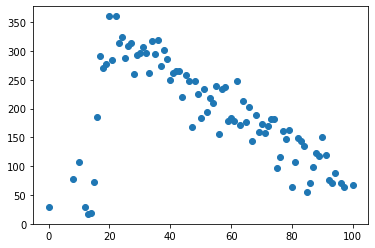

In [229]:
humidity = df.groupby(["humidity"])["count"].mean()
plt.scatter(humidity.index,humidity)

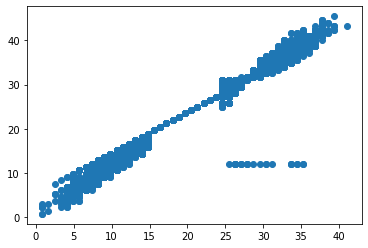

In [230]:
plt.scatter(df["temp"],df["atemp"])

In [235]:
# les points avececcart de temperature ?
masque = [(df["temp"][i]>20) & (df["atemp"][i]<20) for i in range(0,df.shape[0])]
df.drop(df[masque].index,inplace=True)
#c'est toujours la meme valeur de atemp, erreur ?? 2012-08-17

In [236]:
season = df.groupby(["season"]).mean().reset_index()

In [237]:
season.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0.026433,0.680566,1.424423,12.530491,15.228956,56.297841,14.636978,15.489576,100.853686,116.343261
1,2,0.017563,0.692645,1.422978,22.823483,26.647098,60.852909,13.405607,47.446762,167.804610,215.251372
2,3,0.035437,0.672204,1.366556,28.781425,32.721698,64.186047,11.473496,52.135474,181.719823,233.855297
3,4,0.035113,0.675201,1.459766,16.649239,20.059909,66.173738,11.678147,28.580834,170.407462,198.988296


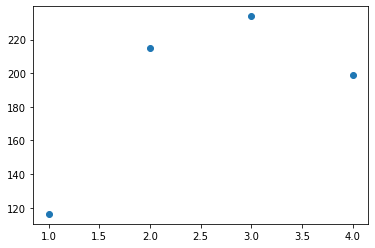

In [238]:
plt.scatter(season["season"],season["count"])

count pour les heures de la journée ?

In [239]:
df["datetime"][10]

Timestamp('2011-01-01 10:00:00')

In [240]:
df["heure"] = [d.time().hour for d in df["datetime"]]

In [241]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,heure
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [242]:
group_heure = df.groupby(["heure"]).mean().reset_index()

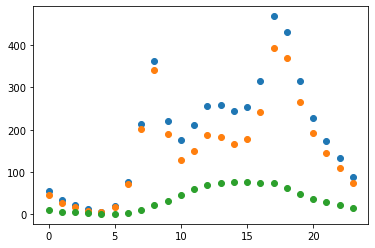

In [243]:
plt.scatter(group_heure["heure"],group_heure["count"])
plt.scatter(group_heure["heure"],group_heure["registered"])
plt.scatter(group_heure["heure"],group_heure["casual"])


corrélations ?

<AxesSubplot:>

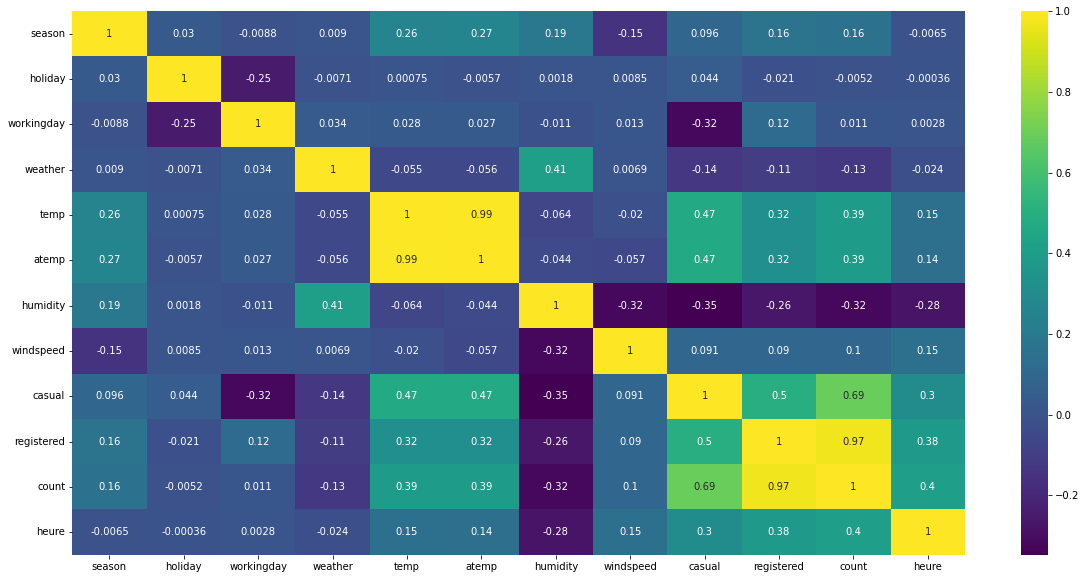

In [244]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="viridis",annot=True)

In [245]:
df["day"] = [d.day for d in df["datetime"]]

In [246]:
df["day"].value_counts()

1     575
9     575
5     575
16    574
15    574
14    574
13    574
19    574
8     574
7     574
4     574
2     573
12    573
3     573
6     572
10    572
11    568
18    563
17    551
Name: day, dtype: int64

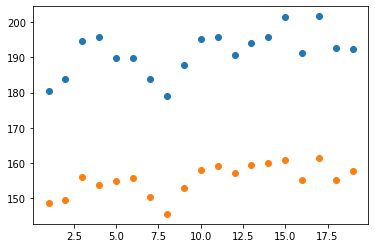

In [247]:
group_day = df.groupby(["day"]).mean()
plt.scatter(group_day.index,group_day["count"])
plt.scatter(group_day.index,group_day["registered"])
#plt.scatter(group_day.index,group_day["casual"])


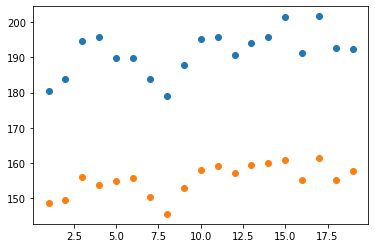

In [248]:
group_day = df.groupby(["day"]).mean()
plt.scatter(group_day.index,group_day["count"])
plt.scatter(group_day.index,group_day["registered"])
#plt.scatter(group_day.index,group_day["casual"])

impact des vacances

In [249]:
df.groupby(["holiday"]).mean()

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,heure,day
holiday,,,,,,,,,,,,
0,2.499858,0.700218,1.419297,20.209025,23.688918,61.891006,12.781451,35.587243,155.913089,191.500332,11.542129,9.991565
1,2.697749,0.000000,1.392283,20.244244,23.397395,62.102894,13.199711,48.781350,137.096463,185.877814,11.527331,9.485531


In [250]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,heure,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1


In [251]:
19*12*24

5472

on tri par jour ?

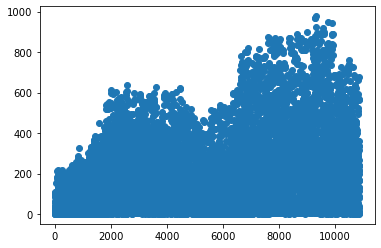

In [252]:
plt.scatter(range(0,df.shape[0]),df["count"])

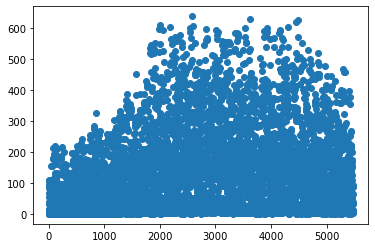

In [253]:
plt.scatter(range(0,5472),df[0:5472]["count"])


impact mois ?

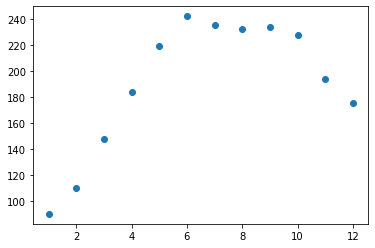

In [254]:
df["month"] = [d.month for d in df["datetime"]]
group_month = df.groupby(["month"]).mean()

plt.scatter(group_month.index,group_month["count"])

extractio dataframe

In [255]:
df[[d.year == 2011 for d in df["datetime"]]]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,heure,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,2011-12-19 19:00:00,4,0,1,2,14.76,17.425,53,11.0014,17,234,251,19,19,12
5418,2011-12-19 20:00:00,4,0,1,1,16.40,20.455,40,11.0014,9,197,206,20,19,12
5419,2011-12-19 21:00:00,4,0,1,2,14.76,17.425,53,8.9981,15,112,127,21,19,12
5420,2011-12-19 22:00:00,4,0,1,2,14.76,17.425,57,11.0014,12,95,107,22,19,12


In [256]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,heure,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


on garde lheure,jour
enlever : atemp, casual, register, datetime

In [257]:
df.drop(columns=["datetime","day","month","casual","registered","atemp"],inplace=True)

In [258]:
df.to_csv("Datas/data_frame_florian.csv",index=False)